# **DBSCAN HYPERPARAMETERS**

## Data & Import

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("nokta.csv")
df.head()

,p1,p2
0,14.541182,9.171020
1,15.066288,7.708681
2,12.784097,9.935294
3,11.746347,9.769397
4,5.807864,14.875203


---
## DBSCAN Epsilon

In [99]:
from sklearn.cluster import DBSCAN
# help(DBSCAN)

In [100]:
dbscan = DBSCAN()

<AxesSubplot:xlabel='p1', ylabel='p2'>

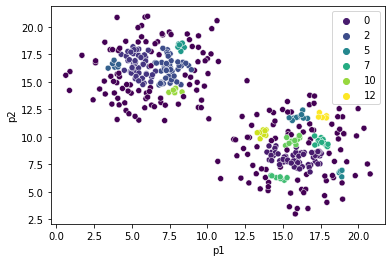

In [101]:
label = dbscan.fit_predict(df)

sns.scatterplot(x="p1", y="p2", data=df, hue=label, palette="viridis")

In [102]:
np.unique(label)
# -1 değeri sınırların dışında kalan değerler için verilen etikettir.

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [103]:
dbscan.labels_[:30]

array([ 0,  0, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, 11,  2,  2,  1, -1,
       -1, -1, -1,  2,  5, -1, -1,  3,  0, -1, 10,  2,  2], dtype=int64)

In [104]:
sum(dbscan.labels_ == -1)

182

In [105]:
def kume(model, data):
    label = model.fit_predict(data)

    sns.scatterplot(x="p1", y="p2", data=data, hue=label, palette="viridis")    
    print("Uç Değer Sayısı: ", sum(dbscan.labels_ == -1))

Uç Değer Sayısı:  1


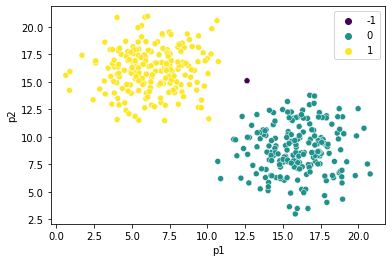

In [106]:
dbscan = DBSCAN(eps=2)
kume(dbscan,df)

Uç Değer Sayısı:  400


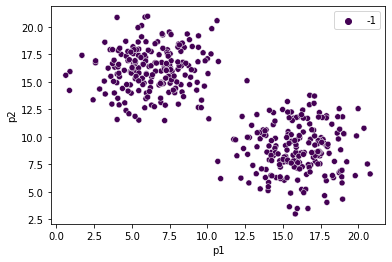

In [107]:
dbscan = DBSCAN(eps=0.1)
kume(dbscan,df)

Uç Değer Sayısı:  0


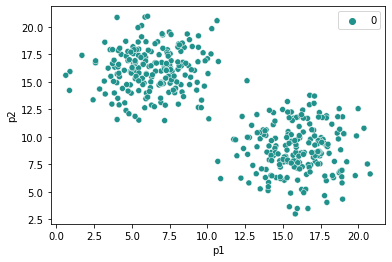

In [108]:
dbscan = DBSCAN(eps=10)
kume(dbscan,df)

---
## Makul Epsilon Değeri

In [120]:
yuzde_deger = []
num_outlier = []

for eps in np.arange(0.01,4,0.01):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(df)
    
    num_outlier.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    yuzde_deger.append(perc_outliers)

Text(0.5, 0, 'Epsilon')

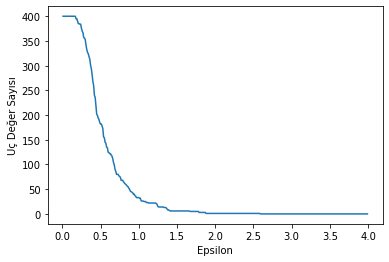

In [125]:
sns.lineplot(x=np.arange(0.01,4,0.01), y=num_outlier)
plt.ylabel("Outlier Sayısı")
plt.xlabel("Epsilon")

Text(0.5, 0, 'Epsilon')

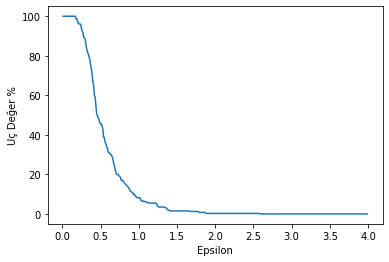

In [126]:
sns.lineplot(x=np.arange(0.01,4,0.01),y=yuzde_deger)
plt.ylabel("Outlier %")
plt.xlabel("Epsilon")

### Uç Değer Sayısı Belirlemek

(1.2, 2.0)

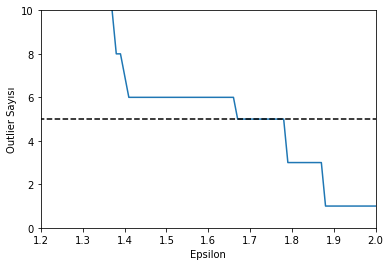

In [138]:
sns.lineplot(x= np.arange(0.01,4,0.01), y=num_outlier)
plt.ylabel("Outlier Sayısı")
plt.xlabel("Epsilon")

plt.hlines(y=5, xmin=0, xmax=4, colors="black", ls="--")
plt.ylim(0,10)
plt.xlim(1.2,2)
# 5 Uç değer kabul edilebilir

Uç Değer Sayısı:  5


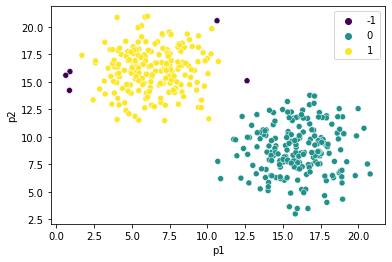

In [145]:
dbscan= DBSCAN(eps=1.7)
kume(dbscan, df)

---

(0.9, 1.1)

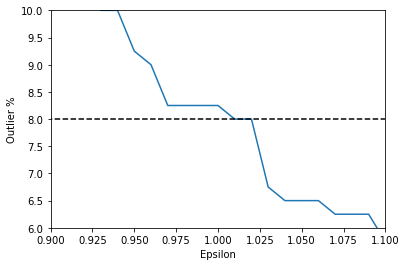

In [144]:
sns.lineplot(x=np.arange(0.01,4,0.01),y=yuzde_deger)
plt.ylabel("Outlier %")
plt.xlabel("Epsilon")

plt.hlines(y=8, xmin=0, xmax=4, colors="black", ls="--")
plt.ylim(6,10)
plt.xlim(0.9,1.1)
# %8 tane outlier kabul edilebilir

Uç Değer Sayısı:  32


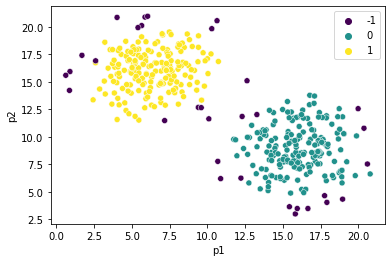

In [146]:
dbscan= DBSCAN(eps=1.01)
kume(dbscan, df)

In [148]:
32/400 * 100

8.0

Değerler tamamen sizi takdirinize kalmış

---
## min_samples=

In [151]:
yuzde_outlier = []

for n in np.arange(1,10):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(df)

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    yuzde_outlier.append(perc_outliers)

Text(0.5, 0, 'Minimum Örnek Sayısı')

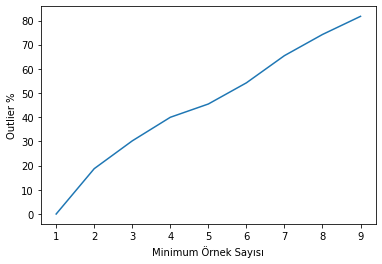

In [152]:
sns.lineplot(x=np.arange(1,10), y=yuzde_outlier)
plt.ylabel("Outlier %")
plt.xlabel("Minimum Örnek Sayısı")

Uç Değer Sayısı:  0


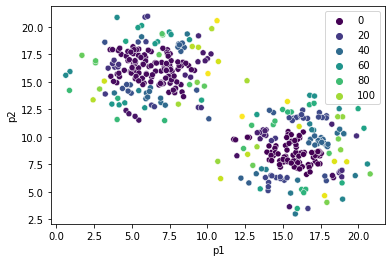

In [156]:
dbscan = DBSCAN(min_samples=1)
kume(dbscan,df)

Uç Değer Sayısı:  0


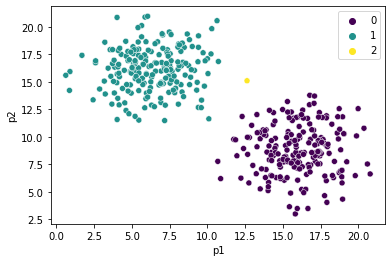

In [158]:
dbscan = DBSCAN(min_samples=1, eps=1.7)
kume(dbscan,df)

Uç Değer Sayısı:  160


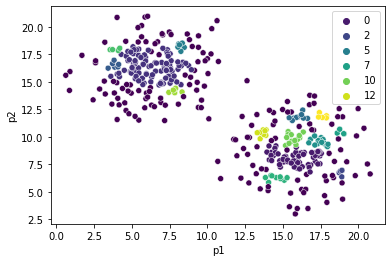

In [160]:
boyut = df.shape[1]
dbscan = DBSCAN(min_samples=2*boyut)
kume(dbscan,df)

Uç Değer Sayısı:  19


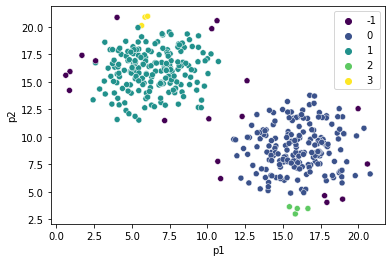

In [159]:
dbscan = DBSCAN(min_samples=2*boyut, eps=1)
kume(dbscan,df)

# **https://www.youtube.com/watch?v=JVL3Kz_x2MA**